# PROJECT: Predict Lending Club Loan Default Risk

### Goal: Predict loan detault risk using high-dimensional data

# PART 0. DATA PROCESSING

## Load Data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500,'display.max_rows', 1000)

%matplotlib inline

In [2]:
df0 = pd.read_csv('LoanStats_2017Q3.csv',low_memory=False,skiprows=1)

In [3]:
df = df0.copy()
df.shape

(122703, 145)

*  122K records, 145 variables

## Inspect data

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,Sep-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,Sep-2005,1.0,10.0,NaN,20.0,0.0,48309.0,34.1%,42.0,w,20895.03,20895.03,14835.31,14835.31,11104.97,3730.34,0.0,0.0,0.0,Dec-2018,1062.71,Jan-2019,Dec-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,10+ years,OWN,42000.0,Source Verified,Sep-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,Jun-1996,0.0,NaN,80.0,9.0,1.0,11457.0,37%,16.0,w,7669.62,7669.62,5270.29,5270.29,4330.38,939.91,0.0,0.0,0.0,Dec-2018,375.88,Jan-2019,Dec-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,NaN,8.0,NaN,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,Driver,9 years,MORTGAGE,120000.0,Verified,Sep-2017,Current,n,NaN,N

In [5]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,122701.000000,122701.000000,122701.000000,122701.000000,1.227010e+05,0.0,0.0,122517.000000,122701.000000,122701.000000,62236.000000,18838.000000,122701.000000,122701.000000,1.227010e+05,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,33252.000000,122701.0,1.399400e+04,13994.000000,122701.000000,122701.000000,1.227010e+05,122701.000000,122701.000000,122701.00000,122701.000000,119164.000000,1.227010e+05,105893.000000,122701.000000,122701.000000,122701.000000,122687.000000,1.227010e+05,122701.000000,122701.000000,122701.000000,122701.000000,122696.000000,120965.000000,120906.000000,122701.000000,122701.000000,119164.000000,122701.000000,122701.000000,122701.000000,122701.000000,121065.000000,29096.000000,108811.000000,42255.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,122701.000000,117266.000000,122701.000000,122701.000000,122701.000000,122701.000000,120963.000000,122701.000000,122701.000000,1.227010e+05,1.227010e+05,122701.000000,1.227010e+05,13994.000000,13994.00000,13994.000000,13994.000000,13789.000000,13994.000000,13994.000000,13994.000000,13994.000000,4851.000000,593.0,593.000000,593.0,593.000000,470.000000,593.000000,593.000000,608.000000,608.000000,608.000000
mean,NaN,14598.099445,14598.099445,14594.647558,435.626191,7.901073e+04,NaN,NaN,19.647346,0.355963,0.507192,33.216547,75.795891,11.628031,0.181262,1.583227e+04,23.237227,7195.478921,7193.997903,8541.070079,8538.889219,6521.668906,1957.147431,1.372002,60.881733,10.203579,2719.649015,0.023610,43.440755,1.0,1.186948e+05,19.352354,0.005607,221.392760,1.431779e+05,0.884377,2.871321,0.63103,1.526296,21.215761,3.586272e+04,68.647418,1.269378,2.759994,5670.882886,57.522614,3.442069e+04,1.005901,1.426834,2.033105,4.554022,13714.155180,12199.359831,55.287769,0.009185,19.457462,124.739879,178.130496,14.348791,8.387234,1.358017,24.495635,37.228141,6.957734,34.138966,0.547551,3.623125,5.500265,4.733719,7.123846,8.517763,8.107505,13.148157,5.422792,11.586173,0.000861,0.003667,0.095941,2.029543,93.488683,39.476140,0.132542,0.041263,1.805380e+05,5.193546e+04

Text(0, 0.5, 'number of variables')

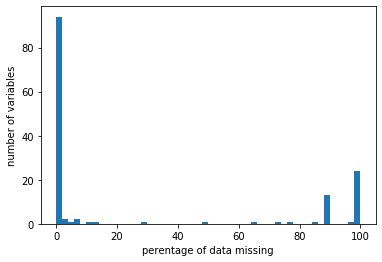

In [6]:
(df.isnull().sum()*100/df.shape[0]).plot.hist(bins=50)
plt.xlabel('perentage of data missing')
plt.ylabel('number of variables')

* some variables have a lot of missing data (more than 80% missing)

## Check datetime data

Date data are originally loaded as strings. Need to convert them into correct datatime format to be used later.


In [6]:
date_trans = ['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line'] 
df[date_trans][:2]

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Sep-2017,Dec-2018,Dec-2018,Sep-2005
1,Sep-2017,Dec-2018,Dec-2018,Jun-1996


Use datetime  to convert date from string to datetime, and reformat to yyyy-mm format.

In [7]:
from datetime import datetime  
from dateutil.parser import parse

for col in date_trans:
    print(col)
    try:
        df.loc[:,col]= df.loc[:,col].apply(lambda x : parse(str(x)).strftime('%Y-%m') if (np.all(pd.notnull(x))) else x)
    except:
        print('except:', col)

issue_d
last_pymnt_d
last_credit_pull_d
earliest_cr_line


In [44]:
df[date_trans][:2]

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,2017-09,2018-12,2018-12,2005-09
1,2017-09,2018-12,2018-12,1996-06


# Handle Missing Data

## missing data summary

In [11]:
nrow = df.shape[0]
v1 = pd.Series(df.columns) #number of rows
v5 = pd.Series([df[col].count() for col in v1]) # number of nun-missing
v2 = pd.Series([(nrow-df[col].count()) for col in v1]) # number of rows - number of nun-missing
v3 = pd.Series(v2/nrow)
v4 = pd.Series((v3>0.8)*1)
missing_info = pd.DataFrame([v1,v5, v2,v3,v4]).T
missing_info.columns=['variable', 'num_notnull','num_null', 'pct_null', 'null_gt80pct']
missing_info = missing_info.sort_values(by='pct_null', ascending=False).reset_index().copy() 
missing_info

,index,variable,num_notnull,num_null,pct_null,null_gt80pct
0,19,desc,0,122703,1,1
1,18,url,0,122703,1,1
2,1,member_id,0,122703,1,1
3,0,id,2,122701,0.999984,1
4,134,orig_projected_additional_accrued_interest,470,122233,0.99617,1
5,130,payment_plan_start_date,593,122110,0.995167,1
6,124,hardship_reason,593,122110,0.995167,1
7,125,hardship_status,593,122110,0.995167,1
8,126,deferral_term,593,122110,0.995167,1
9,127,hardship_amount,593,122110,0.995167,1


* Hardship program and secondary applicants/joint have over 99% and 88% missing, can drop these variables
* 2 rows have systemic missing data in varaibles index 61-144, drop these two rows

## Drop hardship and secondary applicant columns, drop 2 rows with systemic missing

In [12]:
df2 = df.copy()

In [13]:
df2 = df2.drop(missing_info.iloc[:38]['variable'], axis=1).copy()

In [14]:
df2 = df2.dropna(subset = missing_info.iloc[61:]['variable']) 

In [15]:
df2.shape

(122701, 107)

In [16]:
df2.isnull().sum()[df2.isnull().sum()>0].sort_values(ascending=False)/(df2.shape[0])

mths_since_last_record            0.846472
mths_since_recent_bc_dlq          0.762871
mths_since_last_major_derog       0.729000
mths_since_recent_revol_delinq    0.655626
mths_since_last_delinq            0.492783
next_pymnt_d                      0.290853
il_util                           0.136983
mths_since_recent_inq             0.113202
emp_title                         0.071727
emp_length                        0.070578
num_tl_120dpd_2m                  0.044295
mths_since_rcnt_il                0.028826
mo_sin_old_il_acct                0.028826
bc_util                           0.014629
percent_bc_gt_75                  0.014165
bc_open_to_buy                    0.014148
mths_since_recent_bc              0.013333
last_pymnt_d                      0.001581
dti                               0.001500
revol_util                        0.001035
all_util                          0.000114
avg_cur_bal                       0.000041
last_credit_pull_d                0.000008
dtype: floa

## Fill in month-since variables with 600 (50 years) to represent no bad record

In [17]:
varname = df2.columns
monthsince_var = [x for x in varname if (('mths_since' in str(x)) |('mo_sin' in str(x))) ]
monthsince_var

['mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_rcnt_il',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq']

In [19]:
df2[monthsince_var].describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_delinq,62236.0,33.216547,21.812893,0.0,15.0,30.0,48.0,178.0
mths_since_last_record,18838.0,75.795891,24.554209,0.0,60.0,79.0,94.0,119.0
mths_since_last_major_derog,33252.0,43.440755,21.949921,0.0,26.0,43.0,60.0,178.0
mths_since_rcnt_il,119164.0,21.215761,25.425852,0.0,7.0,14.0,25.0,433.0
mo_sin_old_il_acct,119164.0,124.739879,54.711266,0.0,92.0,130.0,154.0,999.0
mo_sin_old_rev_tl_op,122701.0,178.130496,98.800506,2.0,115.0,159.0,229.0,800.0
mo_sin_rcnt_rev_tl_op,122701.0,14.348791,17.913851,0.0,4.0,9.0,18.0,365.0
mo_sin_rcnt_tl,122701.0,8.387234,9.063030,0.0,3.0,6.0,11.0,257.0
mths_since_recent_bc,121065.0,24.495635,32.679430,0.0,6.0,14.0,29.0,594.0
mths_since_recent_bc_dlq,29096.0,37.228141,22.497354,0.0,19.0,34.0,53.0,146.0


In [20]:
df2[monthsince_var] = df2[monthsince_var].fillna(value=600)

## Remote some unuseful varaibles

In [21]:
df2.isnull().sum()[df2.isnull().sum()>0].sort_values(ascending=False)/(df2.shape[0])

next_pymnt_d          0.290853
il_util               0.136983
emp_title             0.071727
emp_length            0.070578
num_tl_120dpd_2m      0.044295
bc_util               0.014629
percent_bc_gt_75      0.014165
bc_open_to_buy        0.014148
last_pymnt_d          0.001581
dti                   0.001500
revol_util            0.001035
all_util              0.000114
avg_cur_bal           0.000041
last_credit_pull_d    0.000008
dtype: float64

In [22]:
df3 = df2.drop(['next_pymnt_d', 'last_pymnt_d', 'emp_title','last_credit_pull_d'], axis = 1) # delete not useful variables

## Fill some missing data with 0 as these are not applicable for users (better than fill in mean)

In [23]:
df3.isnull().sum()[df3.isnull().sum()>0].sort_values(ascending=False)/(df3.shape[0])

il_util             0.136983
emp_length          0.070578
num_tl_120dpd_2m    0.044295
bc_util             0.014629
percent_bc_gt_75    0.014165
bc_open_to_buy      0.014148
dti                 0.001500
revol_util          0.001035
all_util            0.000114
avg_cur_bal         0.000041
dtype: float64

In [24]:
df4 = df3.fillna(0)

In [25]:
df4.isnull().sum().sum()  

0

* missing data cleaning done

## Save processed data to local

In [ ]:
# save to local
df4.to_pickle('df_cleaned.pkl')

# PART 2: FEATURE ENGIHEERING

In [4]:
df4 = pd.read_pickle('df_cleaned.pkl')

In [5]:
df4.shape

(122701, 103)

In [6]:
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,10+ years,MORTGAGE,155000.0,Source Verified,2017-09,Current,n,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,2005-09,1.0,10.0,600.0,20.0,0.0,48309.0,34.1%,42.0,w,20895.03,20895.03,14835.31,14835.31,11104.97,3730.34,0.0,0.0,0.0,1062.71,0.0,600.0,1.0,Individual,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,N,Cash,N
1,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,10+ years,OWN,42000.0,Source Verified,2017-09,Current,n,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,1996-06,0.0,600.0,80.0,9.0,1.0,11457.0,37%,16.0,w,7669.62,7669.62,5270.29,5270.29,4330.38,939.91,0.0,0.0,0.0,375.88,0.0,600.0,1.0,Individual,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,600.0,8.0,600.0,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,Cash,N
2,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,9 years,MORTGAGE,120000.0,Verified,2017-09,Current,n,debt_consolidation,Debt consolidation,778xx,TX,31.11,0.0,2002-04,0.0,600.0,600.0,12.0,0.0,13389.0,20.7%,26.0,w,33144.80,33144.80,13270.21,13270.21,6855.20,6415.01,0.0,0.0,0.0,952.65,0.0,600.0,1.0,Individual,0.0,0.0,227506.0,2.0,3.0,2.0,4.0,3.0,140872.0,26.0,0.0,0.0,10609.0,22.0,64600.0,2.0,3.0,1.0,4.0,20682.0,51211.0,20.7,0.0,0.0,122.0,185.0,26.0,3.0,4.0,26.0,600.0,11.0,600.0,0.0,4.0,4.0,6.0,8.0,9.0,7.0,13.0,4.0,12.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,Cash,N
3,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,< 1 year,MORTGAGE,107000.0,Verified,2017-09,Current,n,debt_consolidation,Debt consolidation,750xx,TX,19.06,0.0,2005-12,0.0,600.0,600.0,25.0,0.0,18533.0,16.1%,52.0,w,21004.72,21004.72,14283.24,14283.24,11995.28,2287.96,0.0,0.0,0.0,1022.12,0.0,600.0,1.0,Joint App,0.0,0.0,244459.0,2.0,2.0,0.0,0.0,46.0,29686.0,42.0,3.0,6.0,9317.0,22.0,115000.0,0.0,1.0,0.0,6.0,9778.0,65368.0,20.0,0.0,0.0,141.0,133.0,5.0,5.0,2.0,6.0,600.0,19.0,600.0,0.0,4.0,10.0,10.0,19.0,12.0,22.0,38.0,10.0,25.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,N,Cash,N
4,7000.0,7000.0,7000.0,36 months,7.97%,219.26,A,A5,10+ years,RENT,32000.0,Sour

In [31]:
df4.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [48]:
numericvars = df4.dtypes.index[df4.dtypes == 'float64']
categoricalvars = df4.dtypes.index[df4.dtypes == 'object']

In [33]:
# check number of unique values in each column, (show sorted front 5 if too many)
for column in numericvars:
    uniques = sorted(df4[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5], uniques[-5:])

loan_amnt             1504	 [1000.0, 1025.0, 1050.0, 1100.0, 1125.0] [39900.0, 39925.0, 39950.0, 39975.0, 40000.0]
funded_amnt           1504	 [1000.0, 1025.0, 1050.0, 1100.0, 1125.0] [39900.0, 39925.0, 39950.0, 39975.0, 40000.0]
funded_amnt_inv       1505	 [1000.0, 1025.0, 1050.0, 1100.0, 1125.0] [39900.0, 39925.0, 39950.0, 39975.0, 40000.0]
installment          13433	 [30.12, 30.86, 30.91, 30.98, 31.04] [1691.28, 1714.54, 1715.42, 1717.63, 1719.83]
annual_inc            9975	 [0.0, 1.0, 6.0, 10.0, 15.0] [4200000.0, 5300000.0, 7010600.0, 10999200.0, 110000000.0]
dti                   6012	 [0.0, 0.01, 0.04, 0.05, 0.06] [879.55, 973.17, 991.57, 995.17, 999.0]
delinq_2yrs             25	 [0.0, 1.0, 2.0, 3.0, 4.0] [20.0, 21.0, 25.0, 28.0, 32.0]
inq_last_6mths           6	 [0.0, 1.0, 2.0, 3.0, 4.0] [1.0, 2.0, 3.0, 4.0, 5.0]
mths_since_last_delinq   132	 [0.0, 1.0, 2.0, 3.0, 4.0] [142.0, 146.0, 160.0, 178.0, 600.0]
mths_since_last_record   121	 [0.0, 1.0, 2.0, 3.0, 4.0] [116.0, 117.0, 118.

In [37]:
# check number of unique values in each column, (show sorted front 5 if too many)
for column in categoricalvars:
    uniques = df4[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5], uniques[-5:])

term                     2	 [' 36 months' ' 60 months'] [' 36 months' ' 60 months']
int_rate                36	 [' 11.99%' '  7.97%' ' 15.05%' '  7.21%' ' 17.09%'] [' 30.17%' ' 30.99%' ' 30.79%' ' 22.91%' '  6.00%']
grade                    7	 ['B' 'A' 'C' 'D' 'F'] ['C' 'D' 'F' 'E' 'G']
sub_grade               35	 ['B5' 'A5' 'C4' 'A3' 'D1'] ['E5' 'F3' 'G5' 'G1' 'E1']
emp_length              12	 ['10+ years' '9 years' '< 1 year' '5 years' '4 years'] [0 '3 years' '6 years' '7 years' '1 year']
home_ownership           5	 ['MORTGAGE' 'OWN' 'RENT' 'ANY' 'NONE'] ['MORTGAGE' 'OWN' 'RENT' 'ANY' 'NONE']
verification_status      3	 ['Source Verified' 'Verified' 'Not Verified'] ['Source Verified' 'Verified' 'Not Verified']
issue_d                  3	 ['2017-09' '2017-08' '2017-07'] ['2017-09' '2017-08' '2017-07']
loan_status              7	 ['Current' 'Fully Paid' 'Late (31-120 days)' 'Charged Off'
 'In Grace Period'] ['Late (31-120 days)' 'Charged Off' 'In Grace Period' 'Late (16-30 days)'
 'Def

## Feature Engineering

In [10]:
df5 = df4.copy()

### delete some duplicated variables or only have 1 single value or not useful

In [11]:
df5 = df5.drop(['funded_amnt','funded_amnt_inv','total_pymnt_inv','policy_code','issue_d','zip_code',\
              'addr_state','earliest_cr_line'], axis=1)

### convert string to number

In [12]:
df5['int_rate_num'] = df5['int_rate'].apply(lambda x: float(x.strip('%')))  # remove % from int_rate

In [13]:
df5['revol_util_num'] = df5['revol_util'].apply(lambda x: float(str(x).strip('%')))  # remove % from int_rate

In [14]:
import re
df5['emp_length_num'] =df5['emp_length'].apply(lambda x: float(re.sub("[^0-9]", "", str(x)))) # convert year of employement to numeric

In [15]:
df5 = df5.drop(['int_rate','revol_util','emp_length'], axis=1)  # drop original var after num conversion

### check other categorical variables

In [16]:
numericvars = df5.dtypes.index[df5.dtypes == 'float64']
categoricalvars = df5.dtypes.index[df5.dtypes == 'object']

In [17]:
for column in categoricalvars:
    print(df5.groupby(column).size())

term
 36 months    88227
 60 months    34474
dtype: int64
grade
A    20796
B    36218
C    42146
D    14736
E     5544
F     1568
G     1693
dtype: int64
sub_grade
A1    4338
A2    3528
A3    3691
A4    3610
A5    5629
B1    7359
B2    6905
B3    7564
B4    6533
B5    7857
C1    8449
C2    7507
C3    8037
C4    8406
C5    9747
D1    2315
D2    3704
D3    3774
D4    2250
D5    2693
E1     471
E2    1170
E3    1174
E4     876
E5    1853
F1     117
F2     237
F3     430
F4     371
F5     413
G1     355
G2     229
G3     303
G4     414
G5     392
dtype: int64
home_ownership
ANY             8
MORTGAGE    59478
NONE            1
OWN         14106
RENT        49108
dtype: int64
verification_status
Not Verified       45191
Source Verified    47151
Verified           30359
dtype: int64
loan_status
Charged Off            7867
Current               82036
Default                   1
Fully Paid            27821
In Grace Period        1300
Late (16-30 days)       664
Late (31-120 days)     3012
dtyp

In [18]:
df5 = df5.drop(['pymnt_plan','purpose','hardship_flag','disbursement_method',\
                'disbursement_method','debt_settlement_flag'], axis=1)  # drop some extremely unbalanced var or duplicated var

### convert grade and subgrade to numbers

In [19]:
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

In [20]:
def map_grade(x):
    return grade_map[x]

df5['grade_num'] = df5['grade'].apply(lambda x: map_grade(x))

In [21]:
subgrade_map = {'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5, \
                'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, \
                'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15, \
                'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20, \
                'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25,\
                'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30, \
                'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}

In [22]:
def map_subgrade(x):
    return subgrade_map[x]

df5['sub_grade_num'] = df5['sub_grade'].apply(lambda x: map_subgrade(x))

In [23]:
df5 = df5.drop(['grade','sub_grade'], axis=1)  # drop original variable after convert to numeric

In [49]:
df5.to_pickle('df5.pkl')

### consolidate any and none to rent (9 cases)

In [ ]:
df6 = df5.copy()

In [51]:
df6['home_ownership_adj'] = np.where(df6['home_ownership'].isin(['ANY','NONE']), 'RENT', df6['home_ownership'])

### Define target variable: current/fully paid = 0, charge-off, default/late/graceperiod = 1

In [52]:
df6.groupby('loan_status').size()

loan_status
Charged Off            7867
Current               82036
Default                   1
Fully Paid            27821
In Grace Period        1300
Late (16-30 days)       664
Late (31-120 days)     3012
dtype: int64

In [53]:
df6['loan_isdefault'] = np.where(df6['loan_status'].isin(['Current','Fully Paid']), 'Not Default', 'Default')
df6['loan_isdefault_num'] = np.where(df6['loan_status'].isin(['Current','Fully Paid']), 0, 1)

In [56]:
df6.groupby('loan_isdefault').size(), df6.groupby('loan_isdefault_num').size()

(loan_isdefault
 Default         12844
 Not Default    109857
 dtype: int64, loan_isdefault_num
 0    109857
 1     12844
 dtype: int64)

In [55]:
df6.groupby('loan_isdefault').size()/df6.shape[0]

loan_isdefault
Default        0.104677
Not Default    0.895323
dtype: float64

* 10.5% are 1, a little unbalanced

In [57]:
df6 = df6.drop(['home_ownership','loan_status'], axis=1)  # drop original variable after convert to numeric

In [58]:
# save to local
df6.to_pickle('df6.pkl')

In [107]:
df6.head()

,loan_amnt,term,installment,annual_inc,verification_status,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_rate_num,revol_util_num,emp_length_num,grade_num,sub_grade_num,home_ownership_adj,loan_isdefault,loan_isdefault_num
0,32000.0,36 months,1062.71,155000.0,Source Verified,Credit card refinancing,12.35,2.0,1.0,10.0,600.0,20.0,0.0,48309.0,42.0,w,20895.03,20895.03,14835.31,11104.97,3730.34,0.0,0.0,0.0,1062.71,0.0,600.0,Individual,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,11.99,34.1,10.0,2,10,MORTGAGE,Not Default,0
1,12000.0,36 months,375.88,42000.0,Source Verified,Debt consolidation,27.74,0.0,0.0,600.0,80.0,9.0,1.0,11457.0,16.0,w,7669.62,7669.62,5270.29,4330.38,939.91,0.0,0.0,0.0,375.88,0.0,600.0,Individual,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,600.0,8.0,600.0,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,7.97,37.0,10.0,1,5,OWN,Not Default,0
2,40000.0,60 months,952.65,120000.0,Verified,Debt consolidation,31.11,0.0,0.0,600.0,600.0,12.0,0.0,13389.0,26.0,w,33144.80,33144.80,13270.21,6855.20,6415.01,0.0,0.0,0.0,952.65,0.0,600.0,Individual,0.0,0.0,227506.0,2.0,3.0,2.0,4.0,3.0,140872.0,26.0,0.0,0.0,10609.0,22.0,64600.0,2.0,3.0,1.0,4.0,20682.0,51211.0,20.7,0.0,0.0,122.0,185.0,26.0,3.0,4.0,26.0,600.0,11.0,600.0,0.0,4.0,4.0,6.0,8.0,9.0,7.0,13.0,4.0,12.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,15.05,20.7,9.0,3,14,MORTGAGE,Not Default,0
3,33000.0,36 months,1022.12,107000.0,Verified,Debt consolidation,19.06,0.0,0.0,600.0,600.0,25.0,0.0,18533.0,52.0,w,21004.72,21004.72,14283.24,11995.28,2287.96,0.0,0.0,0.0,1022.12,0.0,600.0,Joint App,0.0,0.0,244459.0,2.0,2.0,0.0,0.0,46.0,29686.0,42.0,3.0,6.0,9317.0,22.0,115000.0,0.0,1.0,0.0,6.0,9778.0,65368.0,20.0,0.0,0.0,141.0,133.0,5.0,5.0,2.0,6.0,600.0,19.0,600.0,0.0,4.0,10.0,10.0,19.0,12.0,22.0,38.0,10.0,25.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,7.21,16.1,1.0,1,3,MORTGAGE,Not Default,0
4,7000.0,36 months,219.26,32000.0,Source Verified,Debt consolidation,12.27,0.0,1.0,600.0,89.0,13.0,1.0,7736.0,20.0,w,4206.50,4206.50,3313.44,2793.50,519.94,0.0,0.0,0.0,219.26,0.0,600.0,Individual,0.0,0.0,7736.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,1.0,5.0,3446.0,23.0,33900.0,3.0,0.0,5.0,5.0,645.0,11049.0,38.6,0.0,0.0,165.0,145.0,11.0,11.0,0.0,11.0,600.0,1.0,600.0,0.0,3.0,8.0,3.0,6.0,2.0,13.0,18.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,0.0,33900.0,7736.0,18000.0,0.0,7.97,22.8,10.0,1,5,RENT,Not Default,0


## EDA

In [2]:
df6 = pd.read_pickle('df6.pkl')

### list of numceric and categorical varibles

In [3]:
numericvars = df6.dtypes.index[(df6.dtypes != 'object') & (df6.dtypes.index != 'loan_isdefault_num')]
categoricalvars = df6.dtypes.index[(df6.dtypes == 'object') & (df6.dtypes.index != 'loan_isdefault')]

In [4]:
numericvars

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', '

In [5]:
categoricalvars

Index(['term', 'verification_status', 'title', 'initial_list_status',
       'application_type', 'home_ownership_adj'],
      dtype='object')

### inspect categorical variables

In [15]:
for var in categoricalvars:
    print(df6.groupby(var)['loan_isdefault_num'].mean(), '\n')

term
 36 months    0.094008
 60 months    0.131984
Name: loan_isdefault_num, dtype: float64 

verification_status
Not Verified       0.074440
Source Verified    0.111047
Verified           0.139794
Name: loan_isdefault_num, dtype: float64 

title
Business                   0.146919
Car financing              0.067371
Credit card refinancing    0.087763
Debt consolidation         0.110744
Green loan                 0.155844
Home buying                0.127031
Home improvement           0.091227
Major purchase             0.104033
Medical expenses           0.109953
Moving and relocation      0.135283
Other                      0.113324
Vacation                   0.088040
Name: loan_isdefault_num, dtype: float64 

initial_list_status
f    0.124650
w    0.099842
Name: loan_isdefault_num, dtype: float64 

application_type
Individual    0.103489
Joint App     0.113906
Name: loan_isdefault_num, dtype: float64 

home_ownership_adj
MORTGAGE    0.090891
OWN         0.109315
RENT        0.120040

### Inspect multicollinearity among numeric variables

Text(0.5, 1, 'Correlations Among Numeric Features')

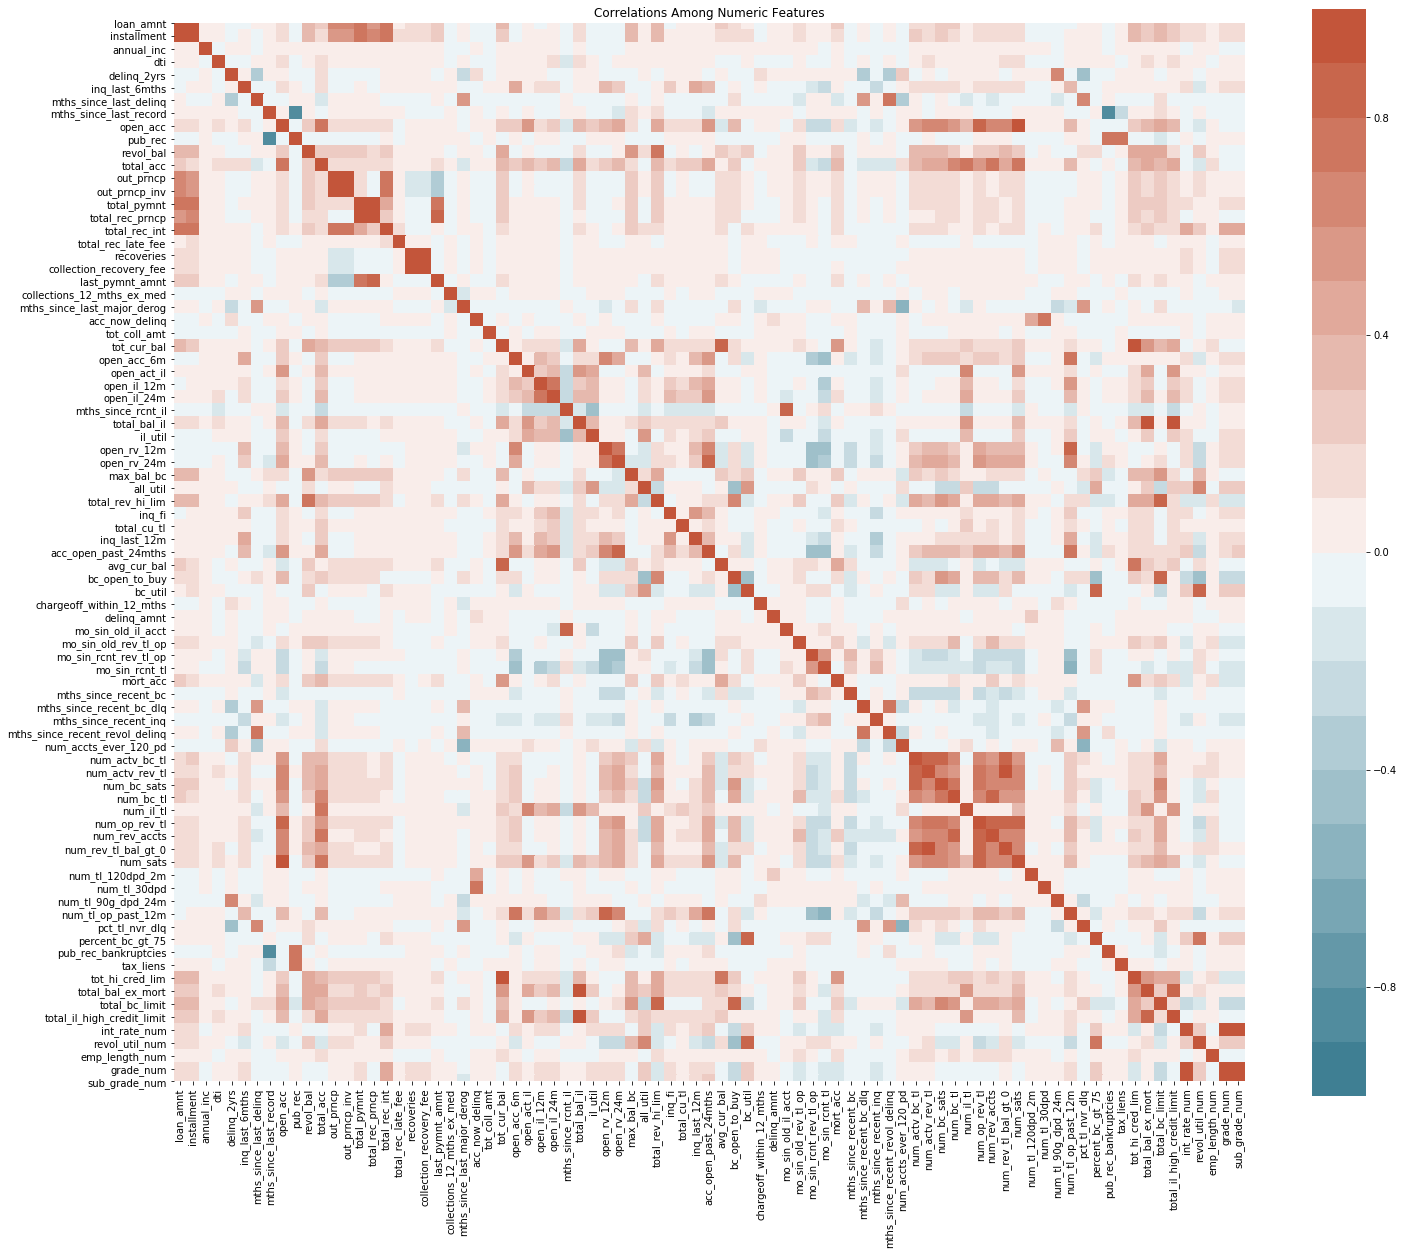

In [14]:
X0 = df6[numericvars]

X0corr = X0.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 20))
sns.heatmap(X0corr, cmap=sns.diverging_palette(220, 20, n=20), ax=ax, square=True, vmin=-1, vmax=1, cbar=True, xticklabels=X0corr.columns,
           yticklabels=X0corr.columns)
ax.set_title('Correlations Among Numeric Features')

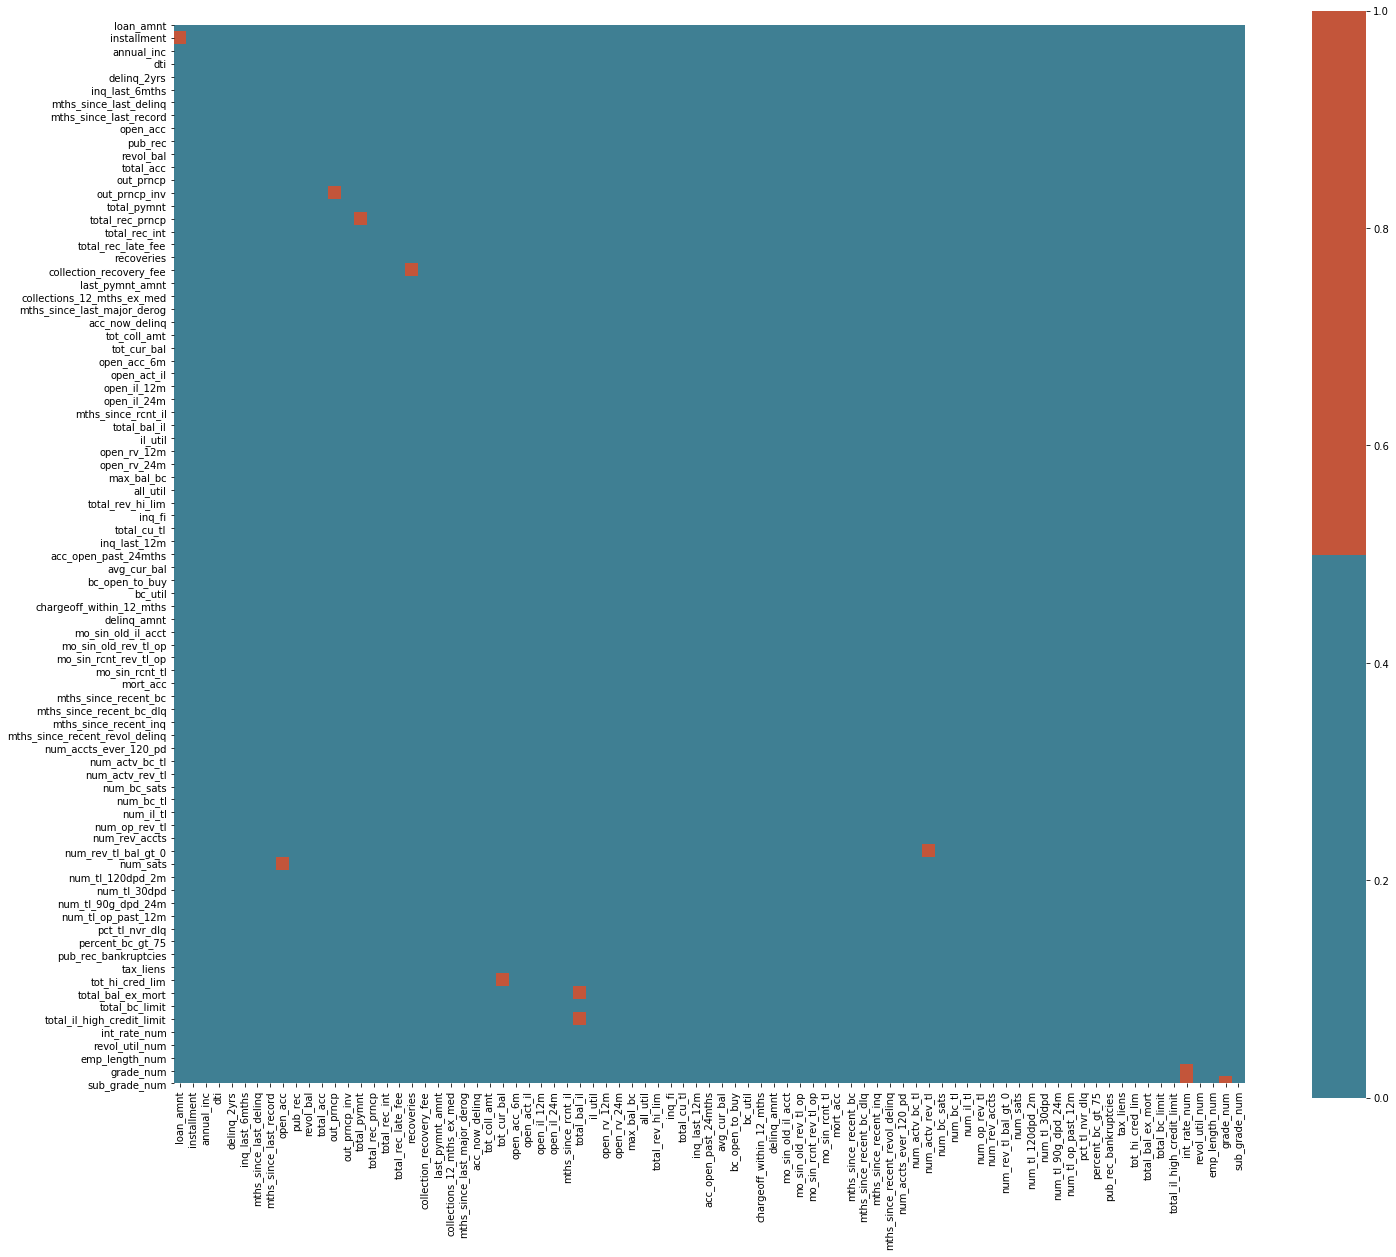

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 20))

X0corr_gt = ((X0corr>0.9) |(X0corr<-0.9) ).astype(int)

# unmark diagnol element and upper-triangle to 0
for i in range(X0corr_gt.shape[0]):
    for j in range(i, X0corr_gt.shape[0]):
        X0corr_gt.iloc[i,j] = 0 

sns.heatmap(X0corr_gt, cmap=sns.diverging_palette(220, 20, n=2), ax=ax, square=True, vmin=0, vmax=1, cbar=True, xticklabels=X0corr_gt.columns,
           yticklabels=X0corr_gt.columns)#ax.xticklabels=X0corr.columns
#ax.yticklabels=X0corr.columns
#ax.set_title('Heatmap of High Correlations (beyond +/-0.9)') 


In [ ]:
# check the high correlation (>0.9)

In [113]:
X0corr_gt.to_csv('X0corr_gt09.csv')

* correlaton beyond +/- 0.9: 
* loan_amnt vs. installment: 
* out_prncp_inv vs. out_prncp: drop 1
* total_rec_prncp vs. total_pymnt: 
* collection_recovery_fee vs. recoveries: drop 1
* num_rev_tl_bal_gt_0 vs num_actv_rev_tl drop 1
* num_sats vs. open_acc:
* tot_hi_cred_lim vs tot_coll_amt 
* total_bal_ex_mort vs total_bal_il
* total_il_high_credit_limit vs total_bal_il
* grade_num vs int_rate_num: drop 1
* sub_grade_num vs int_rate_num
* grade_num vs sub_grade_num : drop 1

In [24]:
df7 = df6.copy()

In [25]:
df7 = df7.drop(['out_prncp_inv','collection_recovery_fee','num_rev_tl_bal_gt_0', 'grade_num'], axis=1)

In [26]:
df7.to_pickle('df7.pkl')

In [18]:
df7 = pd.read_pickle('df7.pkl')

# PART 3: MODELLING

## get dummy for categorical varaibles

In [19]:
df8 = pd.get_dummies(df7, columns=categoricalvars)

In [33]:
df8.head()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_rate_num,revol_util_num,emp_length_num,sub_grade_num,loan_isdefault,loan_isdefault_num,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,title_Business,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,home_ownership_adj_MORTGAGE,home_ownership_adj_OWN,home_ownership_adj_RENT
0,32000.0,1062.71,155000.0,12.35,2.0,1.0,10.0,600.0,20.0,0.0,48309.0,42.0,20895.03,14835.31,11104.97,3730.34,0.0,0.0,1062.71,0.0,600.0,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,11.99,34.1,10.0,10,Not Default,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,12000.0,375.88,42000.0,27.74,0.0,0.0,600.0,80.0,9.0,1.0,11457.0,16.0,7669.62,5270.29,4330.38,939.91,0.0,0.0,375.88,0.0,600.0,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,600.0,8.0,600.0,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,7.97,37.0,10.0,5,Not Default,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,40000.0,952.65,120000.0,31.11,0.0,0.0,600.0,600.0,12.0,0.0,13389.0,26.0,33144.80,13270.21,6855.20,6415.01,0.0,0.0,952.65,0.0,600.0,0.0,0.0,227506.0,2.0,3.0,2.0,4.0,3.0,140872.0,26.0,0.0,0.0,10609.0,22.0,64600.0,2.0,3.0,1.0,4.0,20682.0,51211.0,20.7,0.0,0.0,122.0,185.0,26.0,3.0,4.0,26.0,600.0,11.0,600.0,0.0,4.0,4.0,6.0,8.0,9.0,7.0,13.0,12.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,15.05,20.7,9.0,14,Not Default,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,33000.0,1022.12,107000.0,19.06,0.0,0.0,600.0,600.0,25.0,0.0,18533.0,52.0,21004.72,14283.24,11995.28,2287.96,0.0,0.0,1022.12,0.0,600.0,0.0,0.0,244459.0,2.0,2.0,0.0,0.0,46.0,29686.0,42.0,3.0,6.0,9317.0,22.0,115000.0,0.0,1.0,0.0,6.0,9778.0,65368.0,20.0,0.0,0.0,141.0,133.0,5.0,5.0,2.0,6.0,600.0,19.0,600.0,0.0,4.0,10.0,10.0,19.0,12.0,22.0,38.0,25.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,7.21,16.1,1.0,3,Not Default,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,7000.0,219.26,32000.0,12.27,0.0,1.0,600.0,89.0,13.0,1.0,7736.0,20.0,4206.50,3313.44,2793.50,519.94,0.0,0.0,219.26,0.0,600.0,0.0,0.0,7736.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,1.0,5.0,3446.0,23.0,33900.0,3.0,0.0,5.0,5.0,645.0,11049.0,38.6,0.0,0.0,165.0,145.0,11.0,11.0,0.0,11.0,600.0,1.

In [35]:
df8 = df8.drop(['loan_isdefault'], axis=1)

In [37]:
(df8.dtypes=='object').sum()  # confirm all transform to numeric

0

In [39]:
df8.to_pickle('df8.pkl')

## Start modelling HERE!!!

In [2]:
df8 = pd.read_pickle('df8.pkl')

## preload generic function for performance evaluation

In [3]:
# Function block for metric scores
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['ROC\'s AUC','Accuracy','Precision','Recall','F1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'Metric':metric_names,
                                'Train':metric_values_train,
                                'Test':metric_values_test},columns=['Metric','Train','Test']).set_index('Metric')  
    #all_metrics.to_csv('output/table_' + str(table_name) + '.csv')
    print(all_metrics)  

# Function block for ROC plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name):
    
    roc_auc_train = roc_auc_score(y_train, p_train_pred)               # get the AUC Score using roc_auc_score
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)         # get the vector of FPR and TPR ) using roc_curve

    roc_auc_test = roc_auc_score(y_test, p_test_pred)                  # get the AUC Score using roc_auc_score
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)             # get the vector of FPR and TPR ) using roc_curve
    
    #plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve for ' + str(roc_name))
    plt.legend(loc="lower right")
    #plt.savefig('output/figure_' + str(plot_name) + '.jpg')
    plt.show()

## 80/20 train-test split (stratify by y)

In [4]:
selected_features = [x for x in df8.columns.values if x != 'loan_isdefault_num']

In [5]:
from sklearn.model_selection import train_test_split


df_X = df8[selected_features].copy() 
df_y = df8['loan_isdefault_num'].copy()

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2,  random_state=42) #stratify=df_y,

In [6]:
df_y.mean(), df_y_train.mean(), df_y_test.mean()

(0.10467722349451104, 0.10450285248573757, 0.10537467910843079)

In [7]:
df_X_train.shape, df_X_test.shape

((98160, 103), (24541, 103))

In [8]:
X_train = df_X_train.copy().values
y_train = df_y_train.copy().values
X_test = df_X_test.copy().values
y_test = df_y_test.copy().values

## MODEL 1: Logistic Regression

In [9]:
# Need to standarize data before doing L1/L2 regularization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  roc_auc_score
import datetime

#### test how long to run a model

In [11]:
print(datetime.datetime.now())
lr_clf = LogisticRegression() 
lr_clf.fit(X_train_scaled, y_train)
print(datetime.datetime.now())

2019-08-02 18:55:13.226151


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2019-08-02 18:55:25.637948


* ridge only took 12 seconds to run

In [ ]:
print(datetime.datetime.now())
lr_clf = LogisticRegression(penalty = 'l1') 
lr_clf.fit(X_train_scaled, y_train)
print(datetime.datetime.now())

2019-08-02 11:49:37.674882


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* lasso took super long to run. don't use lasso 

#### Run grid search CV

In [12]:
ladder = np.exp(list(np.linspace(-3, 3, num=20)))  #0.001~1100 equally spaced in logscale

param_lr = {'C':ladder, 'penalty':['l2'] }

lr_clf = LogisticRegression(max_iter=100) 

lr_clf_gs = GridSearchCV(lr_clf, param_grid = param_lr, scoring='roc_auc', iid=False, cv=4, n_jobs=8)
lr_clf_gs.fit(X_train_scaled, y_train)

print('best estimator:', lr_clf_gs.best_estimator_, '\n',
      'best parameter:', lr_clf_gs.best_params_,'\n',
      'best ROC score:', lr_clf_gs.best_score_)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


best estimator: LogisticRegression(C=20.085536923187668, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False) 
 best parameter: {'C': 20.085536923187668, 'penalty': 'l2'} 
 best ROC score: 0.9620994463856192


#### predict using best model

              Train      Test
Metric                       
ROC's AUC  0.963312  0.962070
Accuracy   0.968674  0.968746
Precision  0.973500  0.972468
Recall     0.719828  0.723898
F1-score   0.827664  0.829971


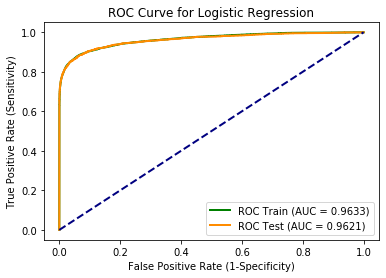

In [13]:
# refit entire training set using best hyperparameters
lr_clf_best = lr_clf_gs.best_estimator_
#lr_clf_best.fit(X_train_scaled, y_train) # don't need to refit, GridSearchCV automatically did

y_train_pred = lr_clf_best.predict(X_train_scaled)
p_train_pred = lr_clf_best.predict_proba(X_train_scaled)[:,1]

y_test_pred = lr_clf_best.predict(X_test_scaled)
p_test_pred = lr_clf_best.predict_proba(X_test_scaled)[:,1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred) #, table_name = 'logistic_reg_performance'
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name = 'Logistic Regression') #, plot_name = 'logistic_reg_roc'

* test ROC 0.97, test Precision 0.97, test recall 0.71, test F1-score 0.82. Not bad.

In [14]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr_clf_best.coef_.flatten()))).sort_values(by=[1], ascending=False)

df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
0,loan_amnt,34.932501
17,recoveries,20.712094
1,installment,10.278475
18,last_pymnt_amnt,5.190548
78,sub_grade_num,0.879415
16,total_rec_late_fee,0.478376
8,open_acc,0.346154
11,total_acc,0.337683
72,total_bal_ex_mort,0.298793
64,num_tl_30dpd,0.276264


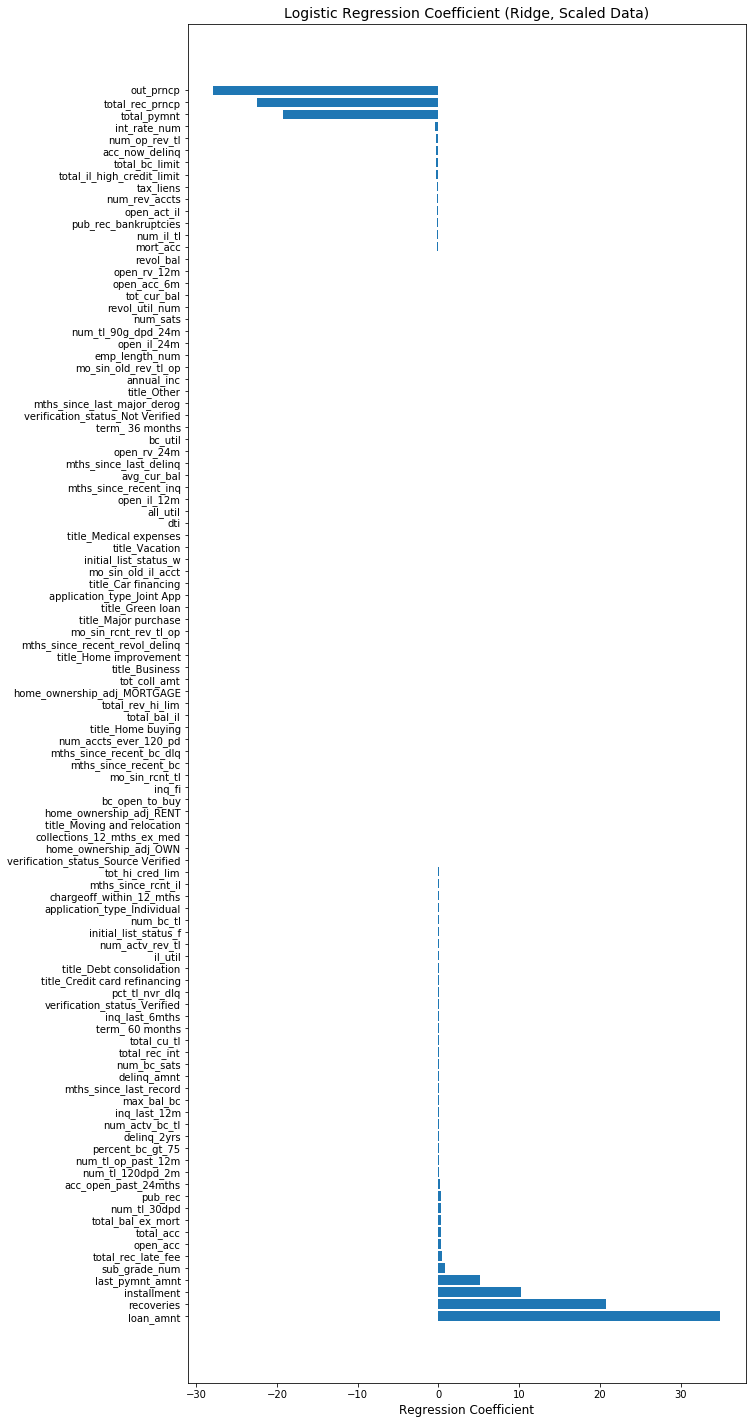

In [15]:
t = np.arange(df_coeffs.shape[0])

plt.figure(figsize=(10,25))
plt.barh(t,df_coeffs['coeff'], tick_label=df_coeffs['feature'])
plt.xlabel('Regression Coefficient', fontsize=12)
plt.title('Logistic Regression Coefficient (Ridge, Scaled Data)', fontsize=14)
plt.show()

In [ ]:
* most important features are:
    *loan amount, recoveries, installment, last payment amount, 

## MODEL 2: Random Forest

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Test how long to run

In [18]:
print(datetime.datetime.now())
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
print(datetime.datetime.now())

2019-08-02 19:08:20.119762
2019-08-02 19:08:53.795675


* 100 trees need 33 seconds

#### Run grid search CV

In [19]:
param_grid = {'n_estimators': [100, 200, 300], #300,
              'max_features': ['auto'], #,'log2'
              'criterion': ['gini'],
              'max_depth': [15,20],  #,25
              'min_samples_split': [2, 10],
              'min_samples_leaf': [2,10], #,20,30
              'n_jobs':[6]}

rf_clf = RandomForestClassifier()

rf_clf_gs = GridSearchCV(rf_clf, param_grid, cv=4, scoring='roc_auc')
rf_clf_gs.fit(X_train, y_train)

print('best estimator:', rf_clf_gs.best_estimator_, '\n',
      'best parameter:', rf_clf_gs.best_params_,'\n',
      'Best ROC score:', rf_clf_gs.best_score_)

best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 best parameter: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'n_jobs': 6} 
 Best ROC score: 0.9500187019824614


              Train      Test
Metric                       
ROC's AUC  0.998950  0.952224
Accuracy   0.970772  0.959211
Precision  1.000000  0.998114
Recall     0.720316  0.614076
F1-score   0.837423  0.760354


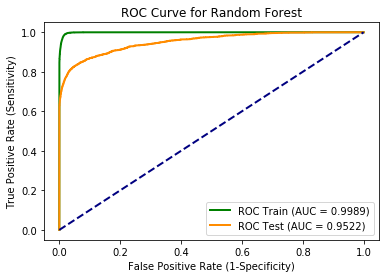

In [20]:
# best estimator 
# GridSearchCV has default refit=1, it will refit the whole training set after finding best hyperparameters
rf_clf_best = rf_clf_gs.best_estimator_
#rf_clf_best.fit(X_train, y_train) # no need to refit

y_train_pred = rf_clf_best.predict(X_train)
p_train_pred = rf_clf_best.predict_proba(X_train)[:,1]

y_test_pred = rf_clf_best.predict(X_test)
p_test_pred = rf_clf_best.predict_proba(X_test)[:,1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred) #, table_name = 'random_forest_performance'
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name='Random Forest') #, plot_name = 'random_forest_featureimportance'

In [21]:
rf_importance = pd.DataFrame(list(zip(selected_features, rf_clf_best.feature_importances_))).sort_values(by=[1], ascending=False)
rf_importance.columns = ['feature', 'importance']
#df_importance.to_csv('output/table_randomforest_importance.csv')
rf_importance

,feature,importance
17,recoveries,0.148706
14,total_rec_prncp,0.147537
12,out_prncp,0.117405
18,last_pymnt_amnt,0.084890
13,total_pymnt,0.075879
1,installment,0.055123
16,total_rec_late_fee,0.045339
0,loan_amnt,0.043509
15,total_rec_int,0.027281
75,int_rate_num,0.017141


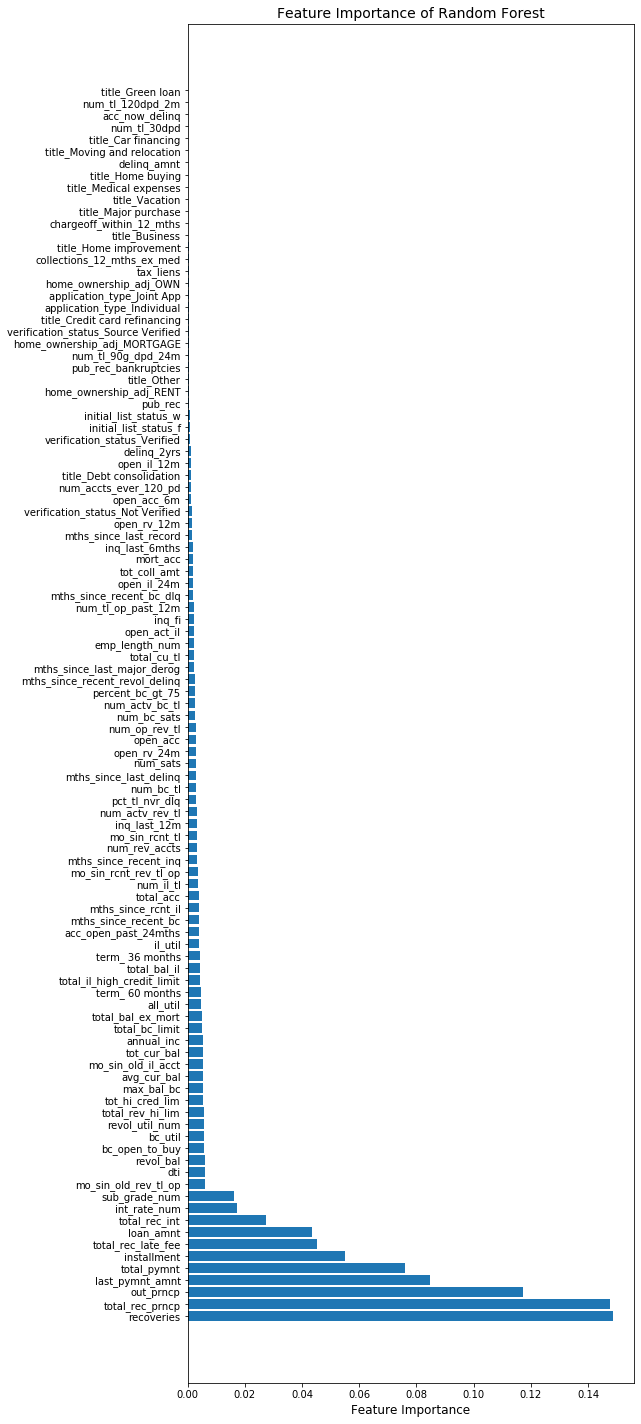

In [22]:
t = np.arange(rf_importance.shape[0])

plt.figure(figsize=(8,25))
plt.barh(t,rf_importance['importance'], tick_label=rf_importance['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance of Random Forest', fontsize=14)
#plt.savefig('output/figure_random_forest_importance.jpg')
plt.show()

## MODEL 3: CART Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

#### test run time

In [24]:
import datetime
print(datetime.datetime.now())
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print(datetime.datetime.now())

2019-08-02 19:26:31.446841
2019-08-02 19:26:37.788875


* only 6 seconds, very fast

#### CV

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_leaf': [2, 10, 50, 100, 200, 300, 0.001, 0.01, 0.05, 0.1],
              'max_features': [None, 0.7, 0.8, 0.9, 1]}

dt_clf = DecisionTreeClassifier()

dt_clf_gs = GridSearchCV(dt_clf, param_grid, cv=4, scoring='roc_auc', n_jobs = 6)

dt_clf_gs.fit(X_train, y_train)

print('best estimator:', dt_clf_gs.best_estimator_, '\n',
      'best parameter:', dt_clf_gs.best_params_,'\n',
      'Best ROC score:', dt_clf_gs.best_score_)

best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 best parameter: {'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 200} 
 Best ROC score: 0.9412159100182613


              Train      Test
Metric                       
ROC's AUC  0.959131  0.939855
Accuracy   0.959719  0.958111
Precision  0.949900  0.944128
Recall     0.648762  0.640371
F1-score   0.770968  0.763134


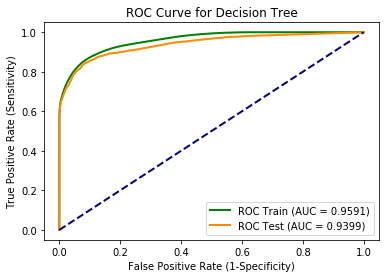

In [26]:
# best estimator 
dt_clf_best = dt_clf_gs.best_estimator_
dt_clf_best.fit(X_train, y_train) # no-harm to do it again

y_train_pred = dt_clf_best.predict(X_train)
p_train_pred = dt_clf_best.predict_proba(X_train)[:,1]

y_test_pred = dt_clf_best.predict(X_test)
p_test_pred = dt_clf_best.predict_proba(X_test)[:,1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name='Decision Tree')

### Decision Tree Feature Importance

In [27]:
dt_importance = pd.DataFrame(list(zip(selected_features, dt_clf_best.feature_importances_))).sort_values(by=[1], ascending=False)
dt_importance.columns = ['feature', 'importance']
#df_importance.to_csv('output/table_randomforest_importance.csv')
dt_importance

,feature,importance
14,total_rec_prncp,2.580351e-01
0,loan_amnt,2.322617e-01
12,out_prncp,2.100431e-01
17,recoveries,8.705496e-02
18,last_pymnt_amnt,6.578393e-02
16,total_rec_late_fee,6.575066e-02
15,total_rec_int,4.403883e-02
13,total_pymnt,1.857442e-02
1,installment,9.241021e-03
75,int_rate_num,5.852674e-03


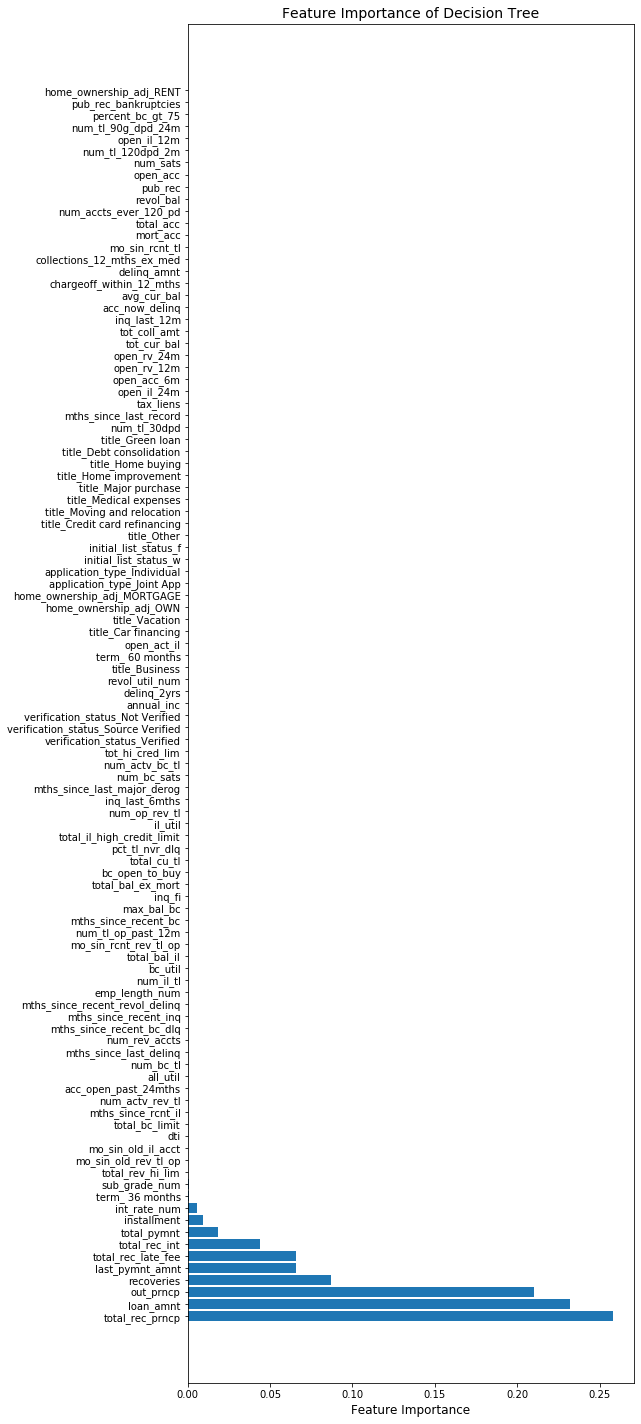

In [49]:
t = np.arange(dt_importance.shape[0])

plt.figure(figsize=(8,25))
plt.barh(t,dt_importance['importance'], tick_label=dt_importance['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance of Decision Tree', fontsize=14)
#plt.savefig('output/figure_random_forest_importance.jpg')
plt.show()

* most important variables using Decision Tree:
recoveries, out_prncp, total_rec_prncp, total_rec_late_fee, total_rec_int, last_pymnt_amnt, int_rate_num, total_pymnt

In [57]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [ ]:
dot_data = StringIO()
export_graphviz(dt_clf_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = selected_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Decision_Tree.png')
Image(graph.create_png())

## MODEL 4: XGBoost

In [33]:
from xgboost import XGBClassifier

### test run time

In [39]:
import datetime
print(datetime.datetime.now())
xgb_clf = XGBClassifier(n_jobs=6)
xgb_clf.fit(X_train, y_train)
print(datetime.datetime.now())

2019-08-02 20:19:49.611523
2019-08-02 20:19:53.160030


In [35]:
xgb_clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)>

* 4 second a run

In [44]:
param_grid = {
     "eta"    : [0.1, 0.3] ,
     "max_depth"        : [6, 9],
     "min_child_weight" : [1, 2],
     "gamma"            : [ 0, 0.1],
     "colsample_bytree" : [ 1, 0.7],
     "n_jobs":[6]}

xgb_clf = XGBClassifier()

xgb_clf_gs = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='roc_auc')
xgb_clf_gs.fit(X_train, y_train)

print('best estimator:', rf_clf_gs.best_estimator_, '\n',
      'best parameter:', rf_clf_gs.best_params_,'\n',
      'Best ROC score:', rf_clf_gs.best_score_)

best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 best parameter: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'n_jobs': 6} 
 Best ROC score: 0.9500187019824614


              Train      Test
Metric                       
ROC's AUC  0.981845  0.966823
Accuracy   0.974419  0.970458
Precision  0.988031  0.979392
Recall     0.764477  0.735112
F1-score   0.861995  0.839850


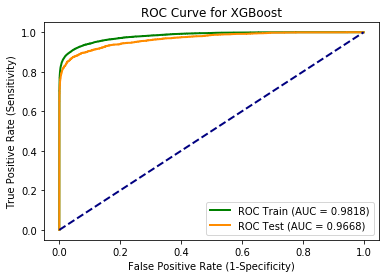

In [45]:
# best estimator 
xgb_clf_best = xgb_clf_gs.best_estimator_
xgb_clf_best.fit(X_train, y_train) # no-harm to do it again

y_train_pred = xgb_clf_best.predict(X_train)
p_train_pred = xgb_clf_best.predict_proba(X_train)[:,1]

y_test_pred = xgb_clf_best.predict(X_test)
p_test_pred = xgb_clf_best.predict_proba(X_test)[:,1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name='XGBoost')

In [48]:
xgb_importance = pd.DataFrame(list(zip(selected_features, xgb_clf_best.feature_importances_))).sort_values(by=[1], ascending=False)
xgb_importance.columns = ['feature', 'importance']
#df_importance.to_csv('output/table_randomforest_importance.csv')
xgb_importance

,feature,importance
17,recoveries,0.597028
0,loan_amnt,0.047703
12,out_prncp,0.039488
16,total_rec_late_fee,0.032688
14,total_rec_prncp,0.026155
18,last_pymnt_amnt,0.025544
13,total_pymnt,0.017385
1,installment,0.016859
79,term_ 36 months,0.016117
75,int_rate_num,0.015233


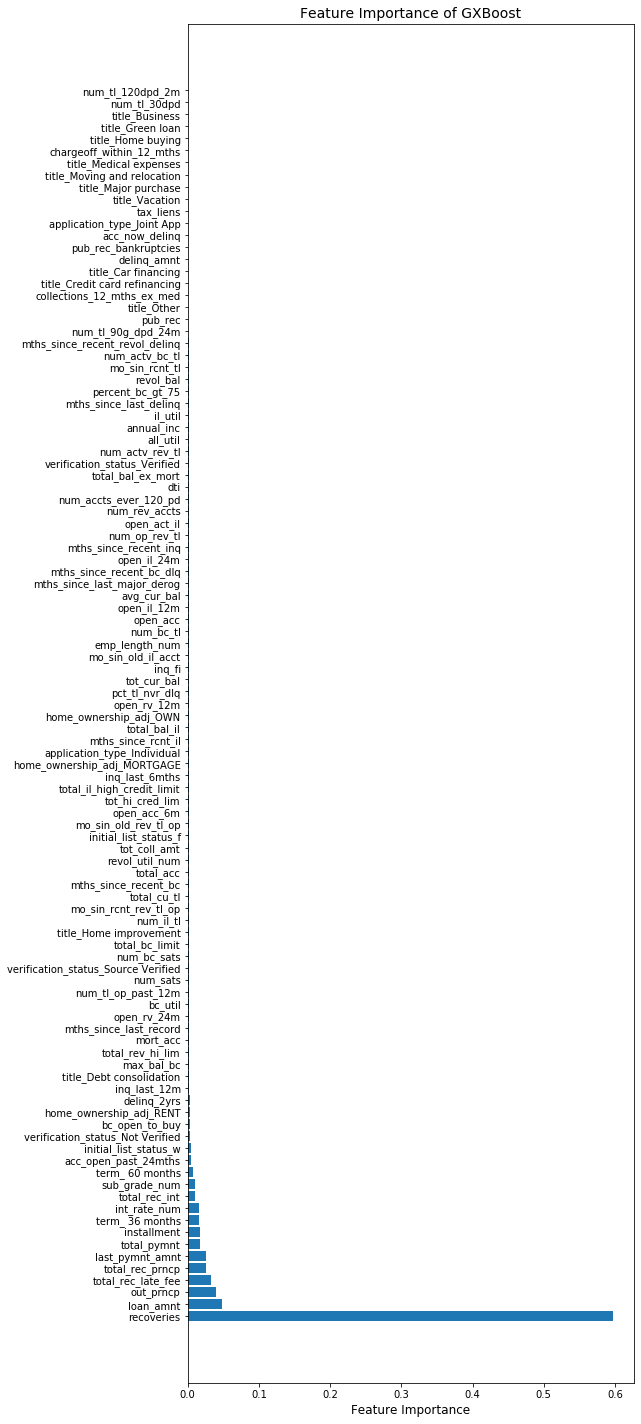

In [50]:
t = np.arange(xgb_importance.shape[0])

plt.figure(figsize=(8,25))
plt.barh(t,xgb_importance['importance'], tick_label=xgb_importance['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance of GXBoost', fontsize=14)
#plt.savefig('output/figure_random_forest_importance.jpg')
plt.show()

## Save the tuned best models to local

In [54]:
import pickle
lr_clf_best = pickle.dumps(lr_clf_best)
rf_clf_best = pickle.dumps(rf_clf_best)
dt_clf_best = pickle.dumps(dt_clf_best)
xgb_clf_best = pickle.dumps(xgb_clf_best)

# PROJECT SUMMARY

## Model performance: XGBoost >~ Logistic Regression > Decision Tree > Random Forest
* XGBoost and Logistic Reg have high predictive performence (test ROC>0.96, test F1-score > 0.83)

In [ ]:
'''
XGBoost
              Train      Test
Metric                       
ROC's AUC  0.981845  0.966823
Accuracy   0.974419  0.970458
Precision  0.988031  0.979392
Recall     0.764477  0.735112
F1-score   0.861995  0.839850

Logistic Regression
              Train      Test
Metric                       
ROC's AUC  0.963312  0.962070
Accuracy   0.968674  0.968746
Precision  0.973500  0.972468
Recall     0.719828  0.723898
F1-score   0.827664  0.829971

Decision Tree
              Train      Test
Metric                       
ROC's AUC  0.959131  0.939855
Accuracy   0.959719  0.958111
Precision  0.949900  0.944128
Recall     0.648762  0.640371
F1-score   0.770968  0.763134

Random Forest
              Train      Test
Metric                       
ROC's AUC  0.998950  0.952224
Accuracy   0.970772  0.959211
Precision  1.000000  0.998114
Recall     0.720316  0.614076
F1-score   0.837423  0.760354

'''

## Most important features include: 

In [ ]:
'''
recoveries **** post charge off gross recovery, higher recovery, higher chance of default (but this variable is linked to outcome, can be excluded to avoid data leakage)
loan_amnt **** higer loan amount, higher chance of default
out_prncp *** Remaining outstanding principal for total amount funded, higher outstanding preincipal, lower chance of default
total_rec_late_fee **** Late fees received to date, higher late fee, higher chance to default
total_rec_prncp *** Principal received to date, higher principle received, lower chance of default
last_pymnt_amnt **** higher last payment amount, higher chance of default
total_pymnt *** higher, lower chance of default
installment **** higher installment, higher chance of default
term_36 months **
int_rate_num ***
total_rec_int ***
sub_grade_num **** higher subgrade, higher chance of default
term_60 months *
open_acc: higher, higher
total_acc: higher, higher
total_bal_ex_mort: higher, higher
num_tl_30dpd: higher, higher
pub_rec: higher, higher
acc_open_past_24mths ** higher open acc in last 24 months, higher chance of default


'''